# Food Delivery Project

## Business problem

Cury Company is a Marketplace that has an application that connects restaurants, delivery people and people. In this project we designed metrics, analyzed data, created a dashboard and built an algorithm to help the CEO to estimate delivery time more accurately.
 


Metrics: 
1. Quantity of orders per day.
2. Quantity of orders per week.
3. Distribution of requests by type of traffic.
4. Comparison of order volume by city and type of traffic.
4. The number of orders per delivery person per week.
5. The central location of each city by traffic type.

1. The lowest and highest age of the couriers.
2. Worst and best condition of vehicles.
3. The average rating per courier.
4. The average rating and standard deviation by traffic type.
5. The mean rating and standard deviation by weather conditions.
6. Top 10 fastest couriers by city.
7. The 10 slowest couriers by city.

1. The amount of unique couriers.
2. Average distance to restaurants and delivery locations.
3. The average delivery time and standard deviation by city.
4. Average delivery time and standard deviation by city and order type.
5. Average delivery time and standard deviation by city and type of traffic.
6. Average delivery time during Festivals.

## Imports

In [101]:
import pandas                 as pd
import numpy                  as np
from   matplotlib             import pyplot as plt
from   matplotlib             import pylab
from   pylab                  import *
import missingno              as msno
import time
from datetime                 import datetime
from pandas_profiling         import ProfileReport
from IPython.display          import Image
import plotly.express         as px
import folium
from haversine import haversine
from PIL import Image
from geopy.geocoders import Nominatim

#from google import colab as cl
#file_upload=cl.files.upload()
import plotly.graph_objects as go

## Loading

In [102]:
df=pd.read_csv(r'C:\Users\Utente77\repos\FTC_Curso\dataset\train.csv')

In [103]:
print( 'Number of Rows: {}'.format( df.shape[0] ) )
print( 'Number of Columns: {}'.format( df.shape[1] ) )

Number of Rows: 45593
Number of Columns: 20


In [104]:
df.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  \
0        Snack      motorcycle                    0      No           Urban    
1        Snack         scooter                    1      No   Metropolitian    
2       Drinks      motorcycle                    1      No           Urban    
3       Buffet      motorcycle                    1      No   Metropolitian    
4        Snack         scooter                    1      No   Metropolitian    

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

In [105]:
df[['Restaurant_latitude','Restaurant_longitude']].median()

Restaurant_latitude     18.546947
Restaurant_longitude    75.898497
dtype: float64

In [106]:
# # #Create empty rows
# df['country']='NA'


# geolocator=Nominatim(user_agent='geoapiExercises')

# for i in range(len(df)):
#     print('Loop:{}/{}'.format(i,len(df)))
#     query=(str(df.loc[i,'Restaurant_latitude'])+','+str(df.loc[i,'Restaurant_longitude']))

# # #API Request
#     response = geolocator.reverse(query)

# # #populate data
#     if 'country' in response.raw['address']:
#         df.loc[i,'country']=response.raw['address']['country']
       
#     elif 
#         pass

In [107]:
df.to_csv('train1.csv')
df=pd.read_csv('train1.csv')

## Clean and transform data

| Attributes     | Meaning|
|----------------|-------
| id                           | Unico ID for transaction
| Delivery_person_ID           | Unique ID for delivery person  
| Delivery_person_Age       |     Age of delivery person       
| Restaurant_latitude      | Restaurant_latitude
| Restaurant_longitude     | Restaurant_longitude
| Delivery_location_latitude    | Delivery_location_latitude
| Delivery_location_longitude       | Delivery_location_longitude
| Order_Date       | Order_Date   
| Time_Orderd       | Time_Orderd  
| Time_Order_picked       | Time_Order_picked              
|Weatherconditions       | Weatherconditions (sunny, storm...)                                                                                  
| Road_traffic_density       | Road_traffic_density (High, Jam, Low...)    
| Vehicle_condition       | Vehicle_condition    
| Type_of_order       | Type_of_order     
| Type_of_vehicle       | Type_of_vehicle
|Festival                  |Festival (yes, no)
|City | City 
| multiple_deliveries   | multiple_deliveries
|Time_taken(min)|Time_taken(min)



In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   45593 non-null  int64  
 1   ID                           45593 non-null  object 
 2   Delivery_person_ID           45593 non-null  object 
 3   Delivery_person_Age          45593 non-null  object 
 4   Delivery_person_Ratings      45593 non-null  object 
 5   Restaurant_latitude          45593 non-null  float64
 6   Restaurant_longitude         45593 non-null  float64
 7   Delivery_location_latitude   45593 non-null  float64
 8   Delivery_location_longitude  45593 non-null  float64
 9   Order_Date                   45593 non-null  object 
 10  Time_Orderd                  45593 non-null  object 
 11  Time_Order_picked            45593 non-null  object 
 12  Weatherconditions            45593 non-null  object 
 13  Road_traffic_den

In [109]:
#Verify spaces in strings
df['Festival'][1]
#df.iloc[0,0]

'No '

In [110]:
# ID - Remove spaces in strings
df.loc[:,'ID']=df.loc[:,'ID'].str.strip()

# Delivery_person_Age - Transform in int
df = df.loc[df['Delivery_person_Age'] != 'NaN ']
df['Delivery_person_Age']=df['Delivery_person_Age'].astype(int)  

# Delivery_person_Ratings Transform in float
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].astype(float)

# Order_Date  - transform in date                  
df['Order_Date'] = pd.to_datetime( df['Order_Date'], format='%d-%m-%Y' )


# Time_Orderd  - transform in date 
df = df.loc[df['Time_Orderd'] != 'NaN ']
df['Time_Orderd'] = pd.to_datetime( df['Time_Orderd'], format='%H:%M:%S'  )

# Time_Order_picked  - transform in date                  
df = df.loc[df['Time_Order_picked'] != 'NaN ']
df['Time_Order_picked'] = pd.to_datetime( df['Time_Order_picked'], format='%H:%M:%S' )
#df['Time_Order_picked'] = df['Time_Order_picked'].dt.strftime('%H:%M:%S' )

# Delivery_person_ID - Remove spaces in strings
#df.loc[:,'Delivery_person_ID']=df.loc[:,'Delivery_person_ID'].str.strip()
df['Delivery_person_ID']=df['Delivery_person_ID'].apply(lambda x: str.strip(x))

# Road_traffic_density - Remove spaces in strings
df.loc[:,'Road_traffic_density']=df.loc[:,'Road_traffic_density'].str.strip()

# Type_of_order - Remove spaces in strings
df.loc[:,'Type_of_order']=df.loc[:,'Type_of_order'].str.strip()

# Type_of_vehicle - Remove spaces in strings
df.loc[:,'Type_of_vehicle']=df.loc[:,'Type_of_vehicle'].str.strip()

# Festival - Remove spaces in strings
df = df.loc[df['Festival'] != 'NaN ']
df.loc[:,'Festival']=df.loc[:,'Festival'].str.strip()

         
# Vehicle_condition Transform in float
df['Vehicle_condition']=df['Vehicle_condition'].astype(int)
   
# Vehicle_condition Transform in float
aux = df['multiple_deliveries'] != 'NaN '

df = df.loc[aux, :]
df['multiple_deliveries']=df['multiple_deliveries'].astype(int)

# City - Remove spaces in strings
df = df.loc[df['City'] != 'NaN ']
df.loc[:,'City']=df.loc[:,'City'].str.strip()

# Time_taken - remove min
df['Time_taken(min)']= df['Time_taken(min)'].apply(lambda x:x.split(' ')[1])
#df['Time_taken(min)']= df['Time_taken(min)'].apply(lambda x:x.replace('(min)',''))
df['Time_taken(min)']=df['Time_taken(min)'].astype(int)

# Change columns name
df.columns = map(str.lower, df.columns)

## Descriptive analysis

In [111]:
num_attributes = df.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )
num_attributes = df.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [112]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

attributes        min           max         range  \
0                   unnamed: 0   0.000000  45592.000000  45592.000000   
1      delivery_person_ratings   2.500000      5.000000      2.500000   
2          restaurant_latitude -30.902872     30.914057     61.816929   
3         restaurant_longitude   0.000000     88.433452     88.433452   
4   delivery_location_latitude   0.010000     31.054057     31.044057   
5  delivery_location_longitude   0.010000     88.563452     88.553452   

           mean        median           std      skew  kurtosis  
0  22759.616987  22690.000000  13155.236147  0.006839 -1.199018  
1      4.633209           NaN      0.315857 -1.781582  5.052081  
2     17.250381     18.554382      7.705775 -1.064220  2.370411  
3     70.768890     75.898497     21.139772 -2.952015  7.078447  
4     17.473196     18.636947      7.341056 -0.703482  0.263684  
5     70.832773     76.002574     21.139973 -2.952006  7.078409

In [113]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

id                      41419
delivery_person_id       1320
delivery_person_age        20
weatherconditions           6
road_traffic_density        4
vehicle_condition           3
type_of_order               4
type_of_vehicle             3
multiple_deliveries         4
festival                    2
city                        3
time_taken(min)            45
dtype: int64

## Data Descriptive

In [114]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile

In [115]:
df['type_of_order'].unique()

array(['Snack', 'Drinks', 'Buffet', 'Meal'], dtype=object)

In [116]:
df['week_of_year'] = df.loc[:,'order_date']

In [117]:
df.head()

unnamed: 0      id delivery_person_id  delivery_person_age  \
0           0  0x4607     INDORES13DEL02                   37   
1           1  0xb379     BANGRES18DEL02                   34   
2           2  0x5d6d     BANGRES19DEL01                   23   
3           3  0x7a6a    COIMBRES13DEL02                   38   
4           4  0x70a2     CHENRES12DEL01                   32   

   delivery_person_ratings  restaurant_latitude  restaurant_longitude  \
0                      4.9            22.745049             75.892471   
1                      4.5            12.913041             77.683237   
2                      4.4            12.914264             77.678400   
3                      4.7            11.003669             76.976494   
4                      4.6            12.972793             80.249982   

   delivery_location_latitude  delivery_location_longitude order_date  ...  \
0                   22.765049                    75.912471 2022-03-19  ...   
1                   13.043041                    77.813237 2022-03-25  ...   
2                   12.924264                    77.688400 2022-03-19  ...   
3                   11.053669                    77.026494 2022-04-05  ...   
4                   13.012793                    80.289982 2022-03-26  ...   

       weatherconditions road_traffic_density vehicle_condition type_of_order  \
0       conditions Sunny                 High                 2         Snack   
1      conditions Stormy                  Jam                 2         Snack   
2  conditions Sandstorms                  Low                 0        Drinks   
3       conditions Sunny               Medium                 0        Buffet   
4      conditions Cloudy                 High                 1         Snack   

   type_of_vehicle multiple_deliveries festival           city  \
0       motorcycle                   0       No          Urban   
1          scooter                   1       No  Metropolitian   
2       motorcycle                   1       No          Urban   
3       motorcycle                   1       No  Metropolitian   
4          scooter                   1       No  Metropolitian   

  time_taken(min) week_of_year  
0              24   2022-03-19  
1              33   2022-03-25  
2              26   2022-03-19  
3              21   2022-04-05  
4              30   2022-03-26  

[5 rows x 22 columns]

## Metrics for the Company 

In [118]:
df1=df.copy()


### Order per day


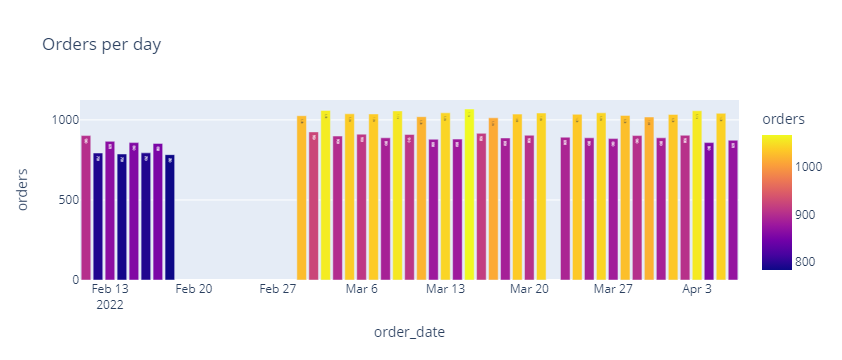

In [119]:
df_aux = df1.loc[:, ['id', 'order_date']].groupby( 'order_date' ).count().reset_index()
df_aux.columns = ['order_date', 'orders']
px.bar( df_aux, x='order_date', y='orders', text_auto='.2s', color='orders', title="Orders per day")
             

### Order per week


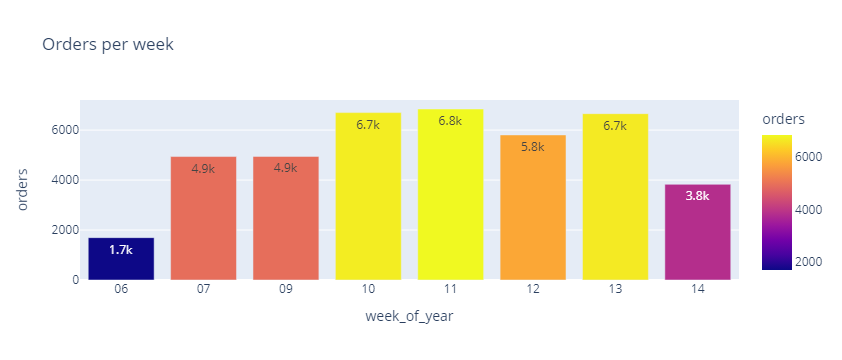

In [120]:
df1['week_of_year'] = df1['order_date'].dt.strftime( "%U" )
df_aux = df1.loc[:, ['id', 'week_of_year']].groupby( 'week_of_year' ).count().reset_index()
df_aux.columns = ['week_of_year','orders']
# gráfico
#px.bar( df_aux, x='week_of_year', y='id' )
px.bar( df_aux, x='week_of_year', y='orders', text_auto='.2s', color='orders', title="Orders per week")

### Orders per traffic density


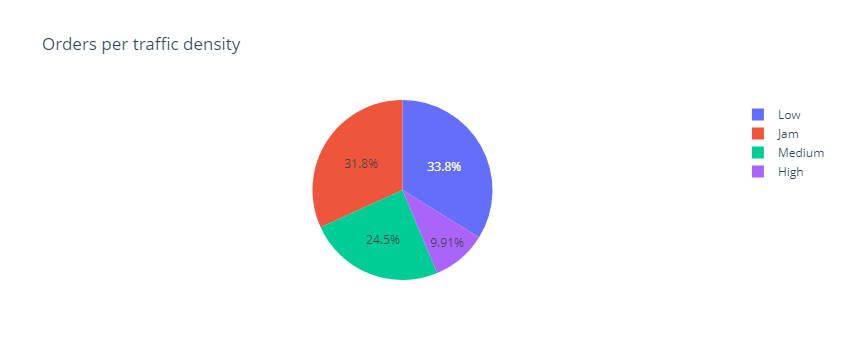

In [121]:
df_aux = df1.loc[:, ['id', 'road_traffic_density']].groupby( 'road_traffic_density' ).count().reset_index()
df_aux['perc_id'] = 100 * ( df_aux['id'] / df_aux['id'].sum() )
# gráfico
px.pie( df_aux, values='perc_id', names='road_traffic_density',title="Orders per traffic density")

### Orders per traffic density and city


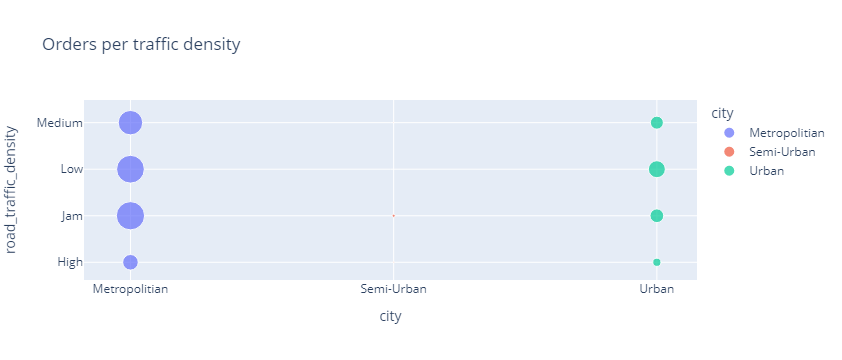

In [122]:
df_aux = df1.loc[:, ['id', 'city','road_traffic_density']].groupby([ 'city','road_traffic_density'] ).count().reset_index()
px.scatter( df_aux, x='city', y='road_traffic_density', size='id', color='city', title="Orders per traffic density")

### Orders per delivery person a week


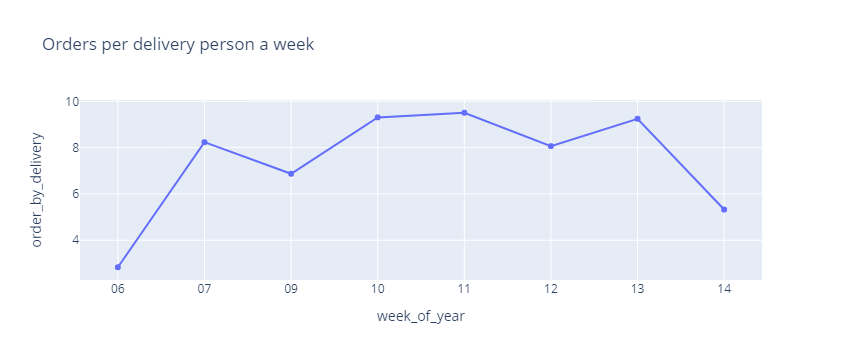

In [123]:
df_aux1 = df1.loc[:, ['id', 'week_of_year']].groupby( 'week_of_year' ).count().reset_index()
df_aux2 = df1.loc[:, ['delivery_person_id', 'week_of_year']].groupby( 'week_of_year').nunique().reset_index()
df_aux = pd.merge( df_aux1, df_aux2, how='inner' )
df_aux['order_by_delivery'] = df_aux['id'] / df_aux['delivery_person_id']
# gráfico
px.line( df_aux, x='week_of_year', y='order_by_delivery', markers=True, title="Orders per delivery person a week" )


### Map

In [124]:
df[['restaurant_latitude','restaurant_longitude']].median()

restaurant_latitude     18.554382
restaurant_longitude    75.898497
dtype: float64

In [125]:
data_plot = df1.loc[:, ['city', 'road_traffic_density', 'delivery_location_latitude', 'delivery_location_longitude']].groupby( ['city','road_traffic_density' ]).median().reset_index()
data_plot
# # Desenhar o mapa
map_ = folium.Map( location=[18.546947,75.898497], zoom_start=5.5)
for index, location_info in data_plot.iterrows():
    folium.Marker( [location_info['delivery_location_latitude'],
    location_info['delivery_location_longitude']],
    popup=location_info[['city', 'road_traffic_density']] ).add_to( map_ )
map_

In [126]:
data_plot.head()

city road_traffic_density  delivery_location_latitude  \
0  Metropolitian                 High                   18.573935   
1  Metropolitian                  Jam                   18.660963   
2  Metropolitian                  Low                   18.629156   
3  Metropolitian               Medium                   18.644080   
4     Semi-Urban                 High                   20.463477   

   delivery_location_longitude  
0                    76.305554  
1                    76.017648  
2                    75.993365  
3                    76.019490  
4                    76.814977

## Metrics for Delivery person

### 1. The lowest and highest age of the couriers.

In [127]:
print('The values are:{}'.format(df1['delivery_person_age'].agg(['max', 'min'])))
#df1[['delivery_person_id','delivery_person_age']].sort_values('delivery_person_age',axis=0, ascending=True).reset_index(drop=True).head()


The values are:max    39
min    20
Name: delivery_person_age, dtype: int32


### 2. Worst and best condition of vehicles.


In [128]:
print('The values are:{}'.format(df1['vehicle_condition'].agg(['max', 'min'])))
#df1[['delivery_person_id','delivery_person_age']].sort_values('delivery_person_age',axis=0, ascending=True).reset_index(drop=True).head()

The values are:max    2
min    0
Name: vehicle_condition, dtype: int32


### 3. The average rating per courier.

In [129]:
df_mean_rating =df1[['delivery_person_id', 'delivery_person_ratings']].groupby('delivery_person_id').mean().reset_index()
df_mean_rating

delivery_person_id  delivery_person_ratings
0        AGRRES010DEL01                 4.761538
1        AGRRES010DEL02                 4.671429
2        AGRRES010DEL03                 4.575000
3         AGRRES01DEL01                 4.522222
4         AGRRES01DEL02                 4.700000
...                 ...                      ...
1315      VADRES19DEL02                 4.632727
1316      VADRES19DEL03                 4.670270
1317      VADRES20DEL01                 4.620370
1318      VADRES20DEL02                 4.591111
1319      VADRES20DEL03                 4.679412

[1320 rows x 2 columns]

### 4. The average rating and standard deviation by traffic type.


In [130]:
df_traffic_rating = df1.loc[:,['road_traffic_density', 'delivery_person_ratings']].groupby('road_traffic_density').agg({'delivery_person_ratings':['mean','std']})
df_traffic_rating.columns=['mean_rating_traffic', 'std_rating_traffic']
df_traffic_rating=df_traffic_rating.reset_index()
df_traffic_rating

road_traffic_density  mean_rating_traffic  std_rating_traffic
0                 High             4.652230            0.273044
1                  Jam             4.594019            0.329778
2                  Low             4.645011            0.338080
3               Medium             4.660138            0.274245

### 5. The mean rating and standard deviation by weather conditions.


In [131]:
df_weather_rating = df1.loc[:,['weatherconditions', 'delivery_person_ratings']].groupby('weatherconditions').agg({'delivery_person_ratings':['mean','std']})
df_weather_rating.columns=['mean_weatherconditions', 'std_weatherconditions']
df_weather_rating=df_weather_rating.reset_index()
df_weather_rating

weatherconditions  mean_weatherconditions  std_weatherconditions
0      conditions Cloudy                4.651871               0.281197
1         conditions Fog                4.652965               0.275060
2  conditions Sandstorms                4.611748               0.310852
3      conditions Stormy                4.611819               0.313096
4       conditions Sunny                4.654868               0.396674
5       conditions Windy                4.616128               0.304565

### 6. Top 10 fastest couriers by city.


In [132]:
df1['distance']=df1[['restaurant_latitude','restaurant_longitude','delivery_location_latitude','delivery_location_longitude']].apply(lambda x: haversine(
    (x['restaurant_latitude'],x['restaurant_longitude']),(x['delivery_location_latitude'],x['delivery_location_longitude'])), axis=1)
df1['min_per_Km']=df1['time_taken(min)']/df1['distance']

In [133]:
import pandas as pd
df_aux=(df1[['delivery_person_id','city','min_per_Km']]
 .groupby(['city','delivery_person_id']).mean().
 sort_values(['city','min_per_Km'],axis=0, ascending=True).reset_index())

df_aux1=df_aux.loc[df_aux['city']=='Metropolitian',:].head(10)
df_aux2=df_aux.loc[df_aux['city']=='Urban',:].head(10)
df_aux3=df_aux.loc[df_aux['city']=='Semi-Urban',:].head(10)
df_faster=pd.concat([df_aux1, df_aux2, df_aux3],axis=0).sort_values(['min_per_Km'],axis=0, ascending=False).reset_index(drop=True)
df_faster.sample(10)

city delivery_person_id  min_per_Km
4      Semi-Urban      MUMRES11DEL02    2.413209
19  Metropolitian     LUDHRES14DEL01    1.655441
13  Metropolitian      ALHRES18DEL03    1.991439
7      Semi-Urban  RANCHIRES010DEL02    2.344666
1      Semi-Urban     INDORES14DEL02    2.441660
21          Urban      GOARES11DEL02    0.847056
18  Metropolitian      DEHRES08DEL03    1.735103
29          Urban      KOLRES04DEL03    0.003786
0      Semi-Urban      BHPRES05DEL02    2.445429
2      Semi-Urban      SURRES07DEL02    2.429015

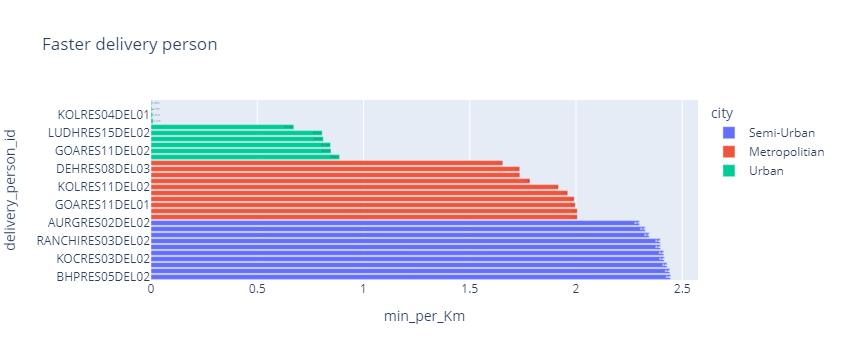

In [134]:
px.bar( df_faster, x='min_per_Km', y='delivery_person_id', text_auto='.2s', color='city', orientation='h',title="Faster delivery person")

### 7. The 10 slowest couriers by city.


In [135]:
df_aux=(df1[['delivery_person_id','city','min_per_Km']]
 .groupby(['city','delivery_person_id']).mean().
 sort_values(['city','min_per_Km'],axis=0, ascending=False).reset_index())

df_aux1=df_aux.loc[df_aux['city']=='Metropolitian',:].head(10)
df_aux2=df_aux.loc[df_aux['city']=='Urban',:].head(10)
df_aux3=df_aux.loc[df_aux['city']=='Semi-Urban',:].head(10)
df_lower=pd.concat([df_aux1, df_aux2, df_aux3],axis=0).sort_values(['min_per_Km'],axis=0, ascending=True).reset_index()
df_lower.sample(10)

index           city delivery_person_id  min_per_Km
16      8          Urban      DEHRES14DEL01   12.934823
22      2          Urban      KNPRES04DEL01   15.411934
5    1426  Metropolitian     AURGRES13DEL01    9.163687
1    1430  Metropolitian     LUDHRES01DEL01    8.816600
28   1278     Semi-Urban   RANCHIRES04DEL01   30.474831
11   1284     Semi-Urban     VADRES010DEL03   10.562829
8    1286     Semi-Urban      MYSRES03DEL03   10.292365
3    1428  Metropolitian      DEHRES06DEL01    9.128314
26   1280     Semi-Urban     INDORES11DEL02   16.859000
14   1282     Semi-Urban   RANCHIRES13DEL03   11.705150

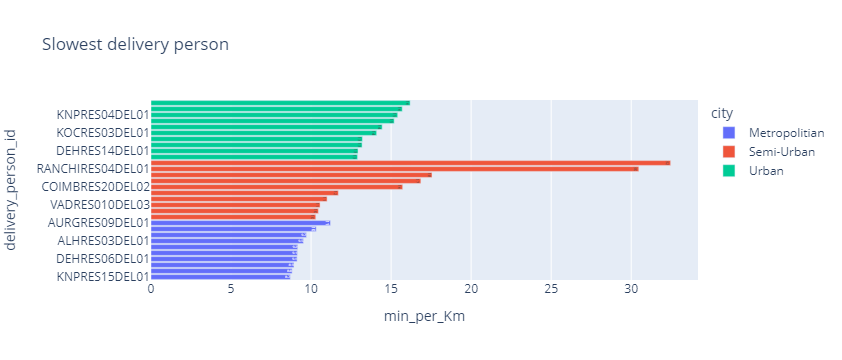

In [136]:
px.bar( df_lower, x='min_per_Km', y='delivery_person_id', text_auto='.2s', color='city', orientation='h',title="Slowest delivery person")

## Metrics for Ristorant

### 1. The amount of unique couriers.


In [137]:
aux=len(df1['delivery_person_id'].unique())
print (aux)

#print( 'Ammount delivery person is: {}'.format( aux.shape[1] ) )

1320


### 2. Average distance to restaurants and delivery locations.


In [138]:
print( 'Average distance to restaurants and delivery locations: {:.2f} KM'.format( df1['distance'].mean() ) )

Average distance to restaurants and delivery locations: 27.44 KM


### 3. The average delivery time and standard deviation by city.


In [139]:
df_delivery = df1.loc[:,['time_taken(min)', 'city']].groupby('city').agg({'time_taken(min)':['mean','std']})
df_delivery.columns=['mean_time_taking', 'std_time_taking']
df_delivery=df_delivery.reset_index()
df_delivery

city  mean_time_taking  std_time_taking
0  Metropolitian         27.428083         9.133374
1     Semi-Urban         49.710526         2.724992
2          Urban         23.209379         8.858049

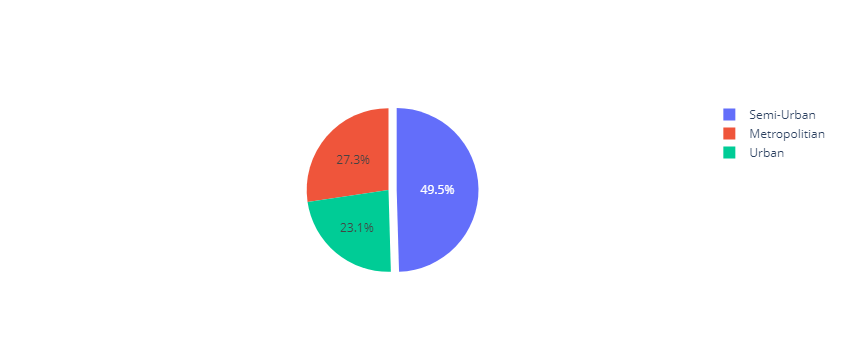

In [140]:
fig=go.Figure(data=[go.Pie(labels=df_delivery['city'],values=df_delivery['mean_time_taking'],pull=[0,0.1,0])])
fig.show()

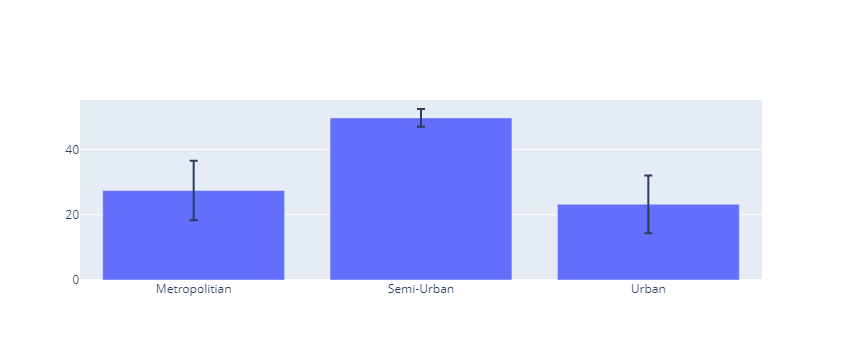

In [141]:
fig=go.Figure()
fig.add_trace(go.Bar(name='Control',
                    x=df_delivery['city'],
                    y=df_delivery['mean_time_taking'],
                    error_y=dict(type='data', array=df_delivery['std_time_taking'])))
fig.update_layout(barmode='group')
fig.show()

### 4. Average delivery time and standard deviation by city and order type.


In [142]:
df_delivery = df1.loc[:,['time_taken(min)', 'city','type_of_order']].groupby(['city','type_of_order']).agg({'time_taken(min)':['mean','std']})
df_delivery.columns=['mean_time_taking', 'std_time_taking']
df_delivery=df_delivery.reset_index()
df_delivery

city type_of_order  mean_time_taking  std_time_taking
0   Metropolitian        Buffet         27.299008         9.153107
1   Metropolitian        Drinks         27.322691         9.041655
2   Metropolitian          Meal         27.616383         9.214536
3   Metropolitian         Snack         27.468414         9.119676
4      Semi-Urban        Buffet         49.707317         2.731702
5      Semi-Urban        Drinks         49.625000         2.459347
6      Semi-Urban          Meal         50.300000         3.041665
7      Semi-Urban         Snack         49.408163         2.707385
8           Urban        Buffet         23.560652         9.056348
9           Urban        Drinks         23.311977         8.927314
10          Urban          Meal         23.040710         8.770178
11          Urban         Snack         22.925021         8.666034

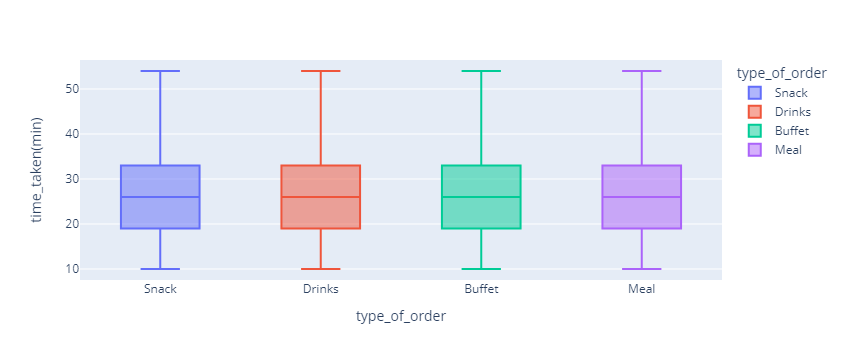

In [143]:
px.box(df1, x="type_of_order",y='time_taken(min)',color='type_of_order')

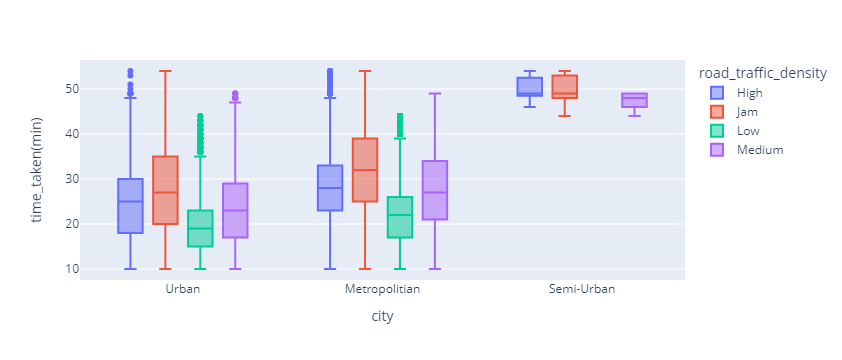

In [151]:
px.box(df1, x="city",y='time_taken(min)',color='road_traffic_density')

### 5. Average delivery time and standard deviation by city and type of traffic.


In [144]:
df_delivery = df1.loc[:,['time_taken(min)', 'city','road_traffic_density']].groupby(['city','road_traffic_density']).agg({'time_taken(min)':['mean','std']})
df_delivery.columns=['mean_time_taking', 'std_time_taking']
df_delivery=df_delivery.reset_index()
df_delivery

city road_traffic_density  mean_time_taking  std_time_taking
0   Metropolitian                 High         28.140898         7.904645
1   Metropolitian                  Jam         31.976991         9.476203
2   Metropolitian                  Low         22.257675         6.794772
3   Metropolitian               Medium         27.729966         8.308064
4      Semi-Urban                 High         50.125000         2.629956
5      Semi-Urban                  Jam         49.841270         2.717095
6      Semi-Urban               Medium         47.400000         2.011080
7           Urban                 High         24.305335         8.494842
8           Urban                  Jam         27.993164        10.078271
9           Urban                  Low         19.446809         6.319963
10          Urban               Medium         23.864962         8.393176

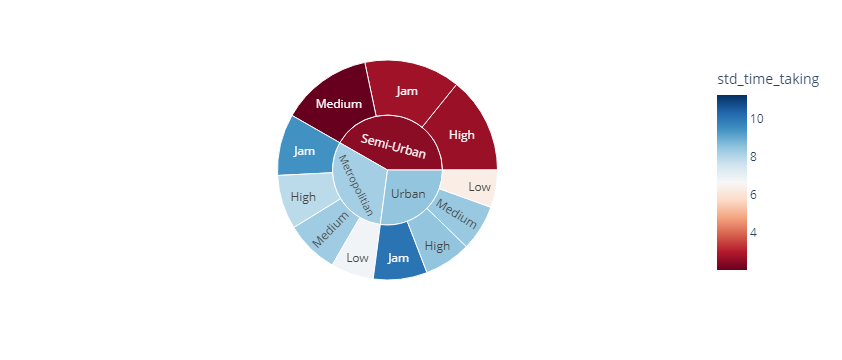

In [145]:
fig=px.sunburst(df_delivery, path=['city','road_traffic_density'], values='mean_time_taking',color='std_time_taking',
                color_continuous_scale='RdBu',color_continuous_midpoint=np.average(df_delivery['std_time_taking']))

fig.show()

### 6. Average delivery time during Festivals.

In [146]:
df_fest=df1.loc[df1['festival']=='Yes']

In [147]:
df_fest['time_taken(min)'].mean()
print( 'Average delivery time during Festivals: {:.2f} min'.format( df1['distance'].mean() ) )

Average delivery time during Festivals: 27.44 min


In [148]:
df_fest = df1.loc[:,['time_taken(min)', 'festival']].groupby(['festival']).agg({'time_taken(min)':['mean','std']})
df_fest.columns=['mean_time_taking', 'std_time_taking']
df_fest=df_fest.reset_index()
df_fest

festival  mean_time_taking  std_time_taking
0       No         26.162741         9.001803
1      Yes         45.518607         4.005399

In [149]:
df1.head()

unnamed: 0      id delivery_person_id  delivery_person_age  \
0           0  0x4607     INDORES13DEL02                   37   
1           1  0xb379     BANGRES18DEL02                   34   
2           2  0x5d6d     BANGRES19DEL01                   23   
3           3  0x7a6a    COIMBRES13DEL02                   38   
4           4  0x70a2     CHENRES12DEL01                   32   

   delivery_person_ratings  restaurant_latitude  restaurant_longitude  \
0                      4.9            22.745049             75.892471   
1                      4.5            12.913041             77.683237   
2                      4.4            12.914264             77.678400   
3                      4.7            11.003669             76.976494   
4                      4.6            12.972793             80.249982   

   delivery_location_latitude  delivery_location_longitude order_date  ...  \
0                   22.765049                    75.912471 2022-03-19  ...   
1                   13.043041                    77.813237 2022-03-25  ...   
2                   12.924264                    77.688400 2022-03-19  ...   
3                   11.053669                    77.026494 2022-04-05  ...   
4                   13.012793                    80.289982 2022-03-26  ...   

  vehicle_condition type_of_order type_of_vehicle multiple_deliveries  \
0                 2         Snack      motorcycle                   0   
1                 2         Snack         scooter                   1   
2                 0        Drinks      motorcycle                   1   
3                 0        Buffet      motorcycle                   1   
4                 1         Snack         scooter                   1   

   festival           city time_taken(min)  week_of_year   distance min_per_Km  
0        No          Urban              24            11   3.025153   7.933482  
1        No  Metropolitian              33            12  20.183558   1.634994  
2        No          Urban              26            11   1.552760  16.744378  
3        No  Metropolitian              21            14   7.790412   2.695621  
4        No  Metropolitian              30            12   6.210147   4.830804  

[5 rows x 24 columns]